<a href="https://colab.research.google.com/github/jhyglory/Section1/blob/main/AI_01_%E1%84%8C%E1%85%A5%E1%86%BC%E1%84%92%E1%85%A1%E1%84%8B%E1%85%A7%E1%86%BC_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()


Saving vgames2.csv to vgames2 (3).csv


# 새 섹션

In [ ]:
# 데이터 불러오기
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
#Unnamed 삭제
df2 = df.drop('Unnamed: 0', axis=1) 
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# 결측치와 데이터 타입 확인
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
# 결측치 삭제
df3 = df2.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
# 년도 오름차순 정렬 
df3.sort_values('Year')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9276,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0,0,0.2,0
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0
14666,Strider 2,PS,0.0,Platform,Virgin Interactive,0.05,0.03,0,0.01
2249,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0,0.09
8681,NCAA Football 2002,PS2,1.0,Sports,Electronic Arts,0.77,0.6,0,0.2
...,...,...,...,...,...,...,...,...,...
1786,The King of Fighters XIV,PS4,2016.0,Fighting,Deep Silver,0.04,0.01,0.03,0.01
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,0.03,0
5310,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,0.01,0
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0,0,0.01,0


In [ ]:
# 연도 정상화, 실수 -> 정수로 바꾸기
change = {0:2000, 1:2001, 2:2002, 3:2003, 4:2004, 5:2005, 6:2006, 7:2007, 8:2008, 
          9:2009,  10:2010, 11:2011, 12:2012, 13:2013, 14:2014, 15:2015, 16:2016, 
          86:1986, 94:1994, 95:1995, 96:1996, 97:1997, 98:1998}

df4 = df3.replace({'Year' : change})
df4['Year'] = pd.to_datetime(df4.Year, format='%Y').dt.year
df4['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [ ]:
# 매출액에 있는 M,K 없애기, 문자열-> 실수로 바꾸기
df4['NA_Sales'] = df4['NA_Sales'].str.replace('M','')
df4['EU_Sales'] = df4['EU_Sales'].str.replace('M','')
df4['JP_Sales'] = df4['JP_Sales'].str.replace('M','')
df4['Other_Sales'] = df4['Other_Sales'].str.replace('M','')
df4['NA_Sales'] = df4['NA_Sales'].apply(lambda x: float(x[:-1])*0.001 if x.endswith('K') else float(x))
df4['EU_Sales'] = df4['EU_Sales'].apply(lambda x: float(x[:-1])*0.001 if x.endswith('K') else float(x))
df4['JP_Sales'] = df4['JP_Sales'].apply(lambda x: float(x[:-1])*0.001 if x.endswith('K') else float(x))
df4['Other_Sales'] = df4['Other_Sales'].apply(lambda x: float(x[:-1])*0.001 if x.endswith('K') else float(x))
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
df4.head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01




---
# 1. 지역에 따라서 선호하는 게임 장르가 다를까 ?
   

*    장르별로 게임의 개수가 다르기 때문에 평균을 구해야 한다고 판단하였다.
*   개수가 같다고 가정해도 특정 장르에서 특정 게임만 매출액이 월등히 높아 그 장르의 총 매출액이 높은 경우 그 장르 자체를 선호한다고 보기에는 무리가 있다. ( 매출액이 높은 게임이 단순히 장르를 선호해서가 아니라 게임의 스토리나 그래픽, 비싼가격 등 추가요인으로 인해 매출액이 높아질 수 있다. )
* -> 궁극적인 목표인 "다음 분기에 어떤 게임을 설계해야 할까?" 라는 질문에 총 매출액이 높은 장르의 게임보다는 평균값이 높은 장르로 게임을 설계하는 것이 실패할 확률이 적다.




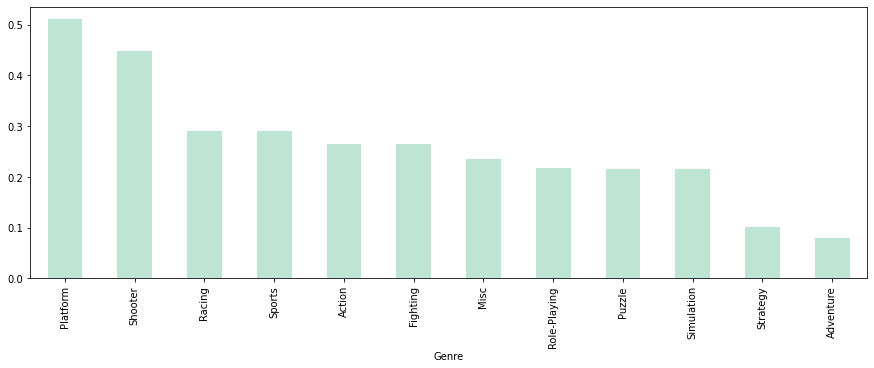

In [ ]:
#장르별 매출액 평균 비교
gb_NA_Sales = df4.groupby('Genre')['NA_Sales'].mean()
NA_bar = gb_NA_Sales.sort_values(ascending=False)
NA_bar.plot(kind='bar',figsize = (15,5), color = '#bee5d3')

북미의 매출액 평균은 Platform -> Shooter -> Racing 순으로 높다.



---



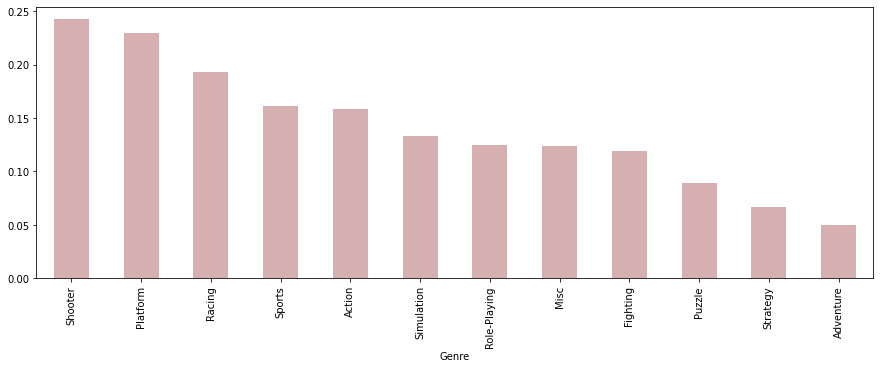

In [ ]:
gb_EU_Sales = df4.groupby('Genre')['EU_Sales'].mean()
EU_bar = gb_EU_Sales.sort_values(ascending=False)
EU_bar.plot(kind='bar',figsize = (15,5), color = '#d6b0b1')

유럽의 매출액 평균은 Shooter -> Platform -> Racing 순으로 높다.





---



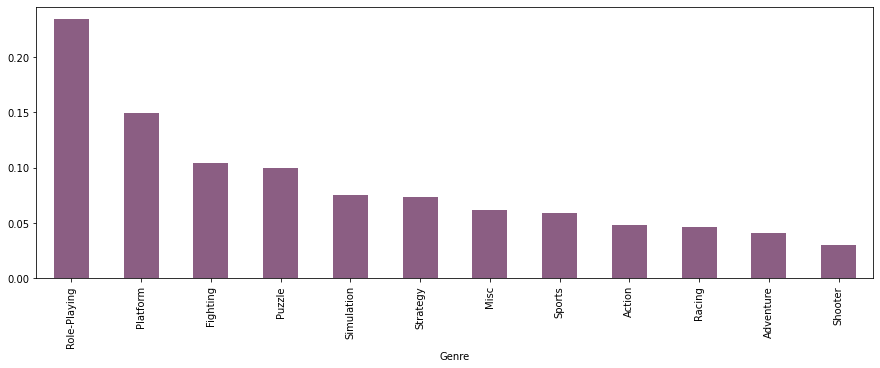

In [ ]:
gb_JP_Sales = df4.groupby('Genre')['JP_Sales'].mean()
gb_bar = gb_JP_Sales.sort_values(ascending=False)
gb_bar.plot(kind='bar',figsize = (15,5), color = '#8b5e83')

일본의 매출액 평균은 Role-playing -> Platform -> Fighting 순으로 높다.



---



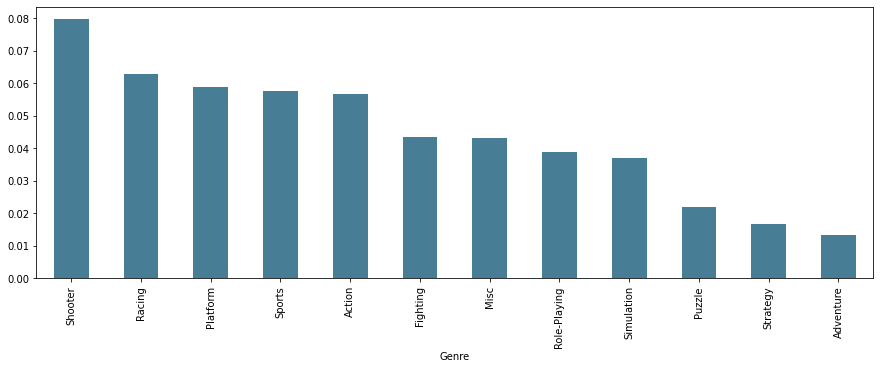

In [ ]:
gb_OtherSales = df4.groupby('Genre')['Other_Sales'].mean()
gb_bar = gb_OtherSales.sort_values(ascending=False)
gb_bar.plot(kind='bar',figsize = (15,5), color = '#487e95')

기타지역의 매출액 평균은 Shooter -> Racing -> Platform 순으로 높다.



---



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


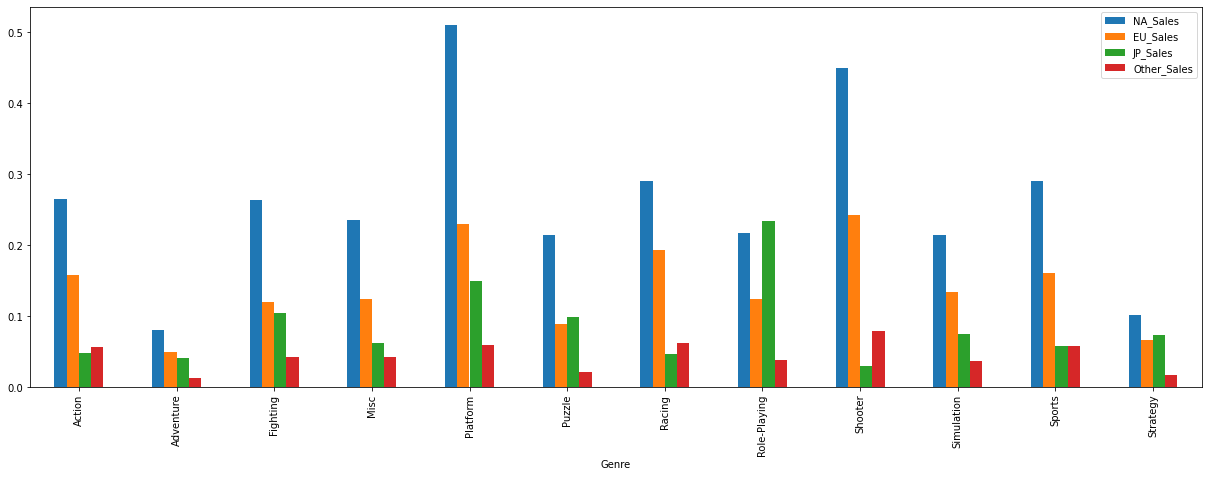

In [ ]:
# 모든 지역과 모든 장르의 매출액 평균 비교
Sales = df4.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].mean()
Sales.plot(kind='bar',figsize = (21,7))

In [ ]:
df4.sort_values('NA_Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
...,...,...,...,...,...,...,...,...,...
8604,Card Fight!! Vanguard G: Stride to Victory!!,3DS,2016,Misc,FuRyu,0.00,0.00,0.04,0.00
8603,Minna no Conveni,DS,2010,Simulation,Taito,0.00,0.00,0.01,0.00
8602,MotoGP 15,X360,2015,Racing,Milestone S.r.l.,0.00,0.01,0.00,0.00
8601,Apassionata: Die Galanacht der Pferde,DS,2009,Simulation,RTL,0.00,0.04,0.00,0.01
